## Исследование данных о российском кинопрокате



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [ ]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

In [45]:
#Познакомимся с представленными к работе данными:



data_movies = pd.read_csv('/datasets/mkrf_movies.csv')

data_shows = pd.read_csv('/datasets/mkrf_shows.csv')

display(data_movies.head(25), data_shows.head(5).round())


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.0
3,111000117,12260956.0
4,111000118,163684058.0


Мы видим, что к работе представлены две таблицы. Это не очень удобно и лучше будет их объединить в следующих шагах. Изучим - возможно ли это?

# Возможно ли объеденение таблиц:

In [46]:
#Для этого проверим - из каких типов данных они состоят? Общее ли количество строк?:

data_movies.info()

data_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Итак, мы видим что таблица data_movies имеет:
- 15 столбцов состоящих из типов данных object и float64 - то есть и строчки и дробные числа, возможно далее мы их изменим. Но это не точно
- Мы видим что общее количество индексов в таблице составляет 7 486, но количества ненулевых значений в некоторых столбцах значительно ниже, поэтому предположим, что данные содержат много пропусков.

Таблица data_shows имеет:
- Два столбца состоящих из числовых значений int64 и float64 
- Здесь мы видим, что из 3 158 индексов столько же данных без пропусков.

Также, для последующего объеденения таблиц нам нужно выбрать столбец, это будет общий для обеих дф столбец 'puNumber'

In [47]:
#Переведем тип данных некоторых столбцов, для последующего объеденения, в подходящий тип:

data_shows['puNumber'] = data_shows['puNumber'].astype('str')


In [75]:
#Объединим таблицы:

data = data_movies.merge(data_shows, how='left', on='puNumber')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

По столбцу box_office сравним данные до объединения и после: 3158 - все на месте.  Теперь у нас единая таблица и мы можем удобно использовать ее данные. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверяем типы данных

- Проверяем типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [76]:
#Проверим типы данных в новой таблице и скорректируем их, при необходимости:


print(data.dtypes)

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object


Видим, что в таблице два типа object и float - котрый относится к столбцам с числовыми значениями. 

Например, столбец show_start_date в процессе работы я приведу к формату datetime. 

Поскольку в типе object можгут содержаться и цифры и символы и буквы, в процессе работы я возможно буду менять их тип данных.

In [77]:
data['ratings'] = pd.to_numeric(data['ratings'],  errors='coerce')

In [14]:
переменные 
типы данных 
функции 
параметры
операции
массивы
объекты

#### Шаг 2.2. Изучаем пропуски в датафрейме

- Объясняю, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [78]:
data.producer.fillna('1')

0               Дэвид Валдес, Кевин Костнер, Джейк Эбертс
1                                                       1
2       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
3       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
4       Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит
                              ...                        
7481                                          Фил Грабски
7482    Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...
7483                                       Дженнифер Додж
7484                                            Д.Ловейко
7485                                            Д.Ловейко
Name: producer, Length: 7486, dtype: object

In [79]:
#Теперь проверим данные на наличие пропусков:

# data.fillna(0)

Мы видим, что пропуски содержат столбцы с данными о получении и расходовании бюджета:

- refundable_support, nonrefundable_support, budget, financing_source, box_office  - возможно не все фильмы получали гос. поддержку. Но так как много пропусков есть и в значениях общего бюджета фильма и кассового сбора, то вероятно все же данные представлены не полном объеме.

Поскольку у нас нет дополнительного источника информации, то оставим пропуски т.к. замена на ноль при таком количестве пропусков может исказить данные.

Другие столбцы имеющие пропуски, содержат сведения о создателях фильмов и шоу, таким образом мы можем заменить их нейтральным значением "нет данных"

In [80]:
#Заменим количественные пропуски:

# data['refundable_support'] = data['refundable_support'].fillna(0) 
# data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0)
# data['budget'] = data['budget'].fillna(0)
data['ratings'] = data['ratings'].fillna(0)
# data['box_office'] = data['box_office'].fillna(0)
# data['producer'] = data['producer'].fillna(0)

#И проверим:

data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                     0
genres                    976
box_office               4328
dtype: int64

Когда речь заходит о бюджетных средствах, я считаю совершенно некорретным приводить значения к медианным или средним. Поэтому оставляю ноль как "заглушку". На мой взгляд в данном случае лучше выбрать вариант: недостаточно информации, чем привести информацию к среднему значению.

In [10]:
#Теперь заменим пропуски категориальных переменных:


data['film_studio'] = data['film_studio'].fillna('нет данных')
data['production_country'] = data['production_country'].fillna('нет данных')
data['director'] = data['director'].fillna('нет данных')
data['producer'] = data['producer'].fillna('нет данных')
data['genres'] = data['genres'].fillna('нет данных')
data['financing_source'] = data['financing_source'].fillna('нет данных')

#И проверим:

data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source            0
ratings                     0
genres                      0
box_office               4328
dtype: int64

In [11]:
#КОД РЕВЬЮЕРА

np.nan == np.nan

False

Больше в наших данных нет пропусков, но берем на заметку, что финансовые показатели могут быть недостоверными.

Хочу отметить что не все пропуски случайные. Так например:

В столбцах refundable_support/nonrefundable_support мы видим одинаковое количество пропусков 7 154 и эти столбцы связаны тематически, возможно, что пропусками обозначено - отсутствие гос. поддержки, то есть пропуски случайные

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверяем, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [12]:
#Посмотрим сколько уникальных значений содержит наш датафрейм:

print(data['title'].unique().tolist())                 

['Открытый простор', 'Особо важное задание', 'Особо опасен', 'Остановился поезд', 'Любовь и голуби', 'Любовь и сигареты', 'Отпетые мошенники.', 'Отпуск за свой счет', 'Превосходство Борна /По одноименной новелле Роберта Ладлэма/', 'Ответный ход', 'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/', 'Преданный садовник', 'Отель /По мотивам пьесы Джона Уэбстера/', 'Председатель', 'Осенний марафон', 'Осень', 'Неподдающиеся', 'Неподсуден', 'Незабываемый 1919-й год', 'Незаконченная жизнь', 'Операция "Ы" и другие приключения Шурика', 'Неизвестные страницы из жизни разведчика', 'Неисправимый лгун', 'Призрак замка Моррисвиль', 'Оружейный барон', 'Отставной козы барабанщик', 'Паршивая овца', 'Плюмбум, или Опасная игра', 'Первое свидание', 'Охота на лис.', 'Пиноккио 3000', 'Перелом', 'Мисс Поттер', 'Миссис Хендерсон представляет', 'Планета КА-ПЭКС /По мотивам романа Джин Бруэр/', 'Молчи в тряпочку', 'Мужики!..', 'Автомобиль, скрипка и собака Клякса', 'Алекс и Эмм

При визуальном исследовании данных, наиболее частое повторение в названиях фильмов встречается у лент получивших разные прокатные удостоверения. Поскольку целью исследования являются тренды и предпочтения зрителей, а также положения лент получивших гос. поддержку считаю, что подобные повторы не повлияют на исследование

In [13]:
#Проверим у каких фильмов больше всего прокатных удостоверений:

data['title'].value_counts()

День святого Валентина_                                                                             5
Рапунцель: Запутанная история                                                                       4
Белоснежка и охотник                                                                                4
Красавчик-2                                                                                         4
Секс в большом городе 2                                                                             4
                                                                                                   ..
Лео Делиб. Лакме /По роману Пьера Лоти "Рараю или Женитьба Лоти"/. Постановка Sydney Opera House    1
Спящая принцесса                                                                                    1
Пока еще жива                                                                                       1
Страшная воля богов                                                               

Это подтвердило версию о том, что некоторые дубликаты все же имеют место быть.

In [14]:
#Проверим количество дубликатов:

data.duplicated().sum()    


0

In [15]:
#Удаляем дубликаты и восстанавливаем индексацию таблицы:

#data = data.drop_duplicates().reset_index(drop = True)

data.duplicated().sum()

0

In [16]:
data['puNumber'].duplicated().sum()


2

#### Шаг 2.4. Изучаем категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [17]:
#Вернемся к типам данных, все категориальные столбцы имеют тип object, 
#значит в ней могут содержаться разные символы, например пробелы, что может вызвать ошибку в дальнейшем:

data.info()

#Исправим это:

data['type'] = data['type'].str.strip()

display(data[20:60])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7486 non-null   object 
 5   production_country     7486 non-null   object 
 6   director               7486 non-null   object 
 7   producer               7486 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       7486 non-null   object 
 13  ratings                7486 non-null   float64
 14  genres                 7486 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
20,Незабываемый 1919-й год,111003316,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Чиаурели,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,5.8,"драма,история",NaN
21,Незаконченная жизнь,121015405,2015-05-06T12:00:00.000Z,Художественный,"Инишиэл Интертейнмент Групп, Мирамакс Филмз, П...",США,Лассе Халлстрем,"Лесли Холлеран, Алан Лэдд мл., Келлиан Лэдд, Х...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.2,"драма,мелодрама,семейный",NaN
22,"Операция ""Ы"" и другие приключения Шурика",111007413,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Л.Гайдай,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,8.7,"комедия,мелодрама,криминал",380.0
23,Неизвестные страницы из жизни разведчика,111003416,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Чеботарев,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,6.3,"драма,военный",NaN
24,Неисправимый лгун,111003516,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Азаров,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,7.7,комедия,NaN
25,Призрак замка Моррисвиль,221072614,2014-12-29T12:00:00.000Z,Художественный,Фильмове Студио Баррандов,Чехословакия,Боривой Земан,нет данных,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,7.7,комедия,NaN
26,Оружейный барон,221012515,2015-04-03T12:00:00.000Z,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,7.7,"боевик,драма,криминал",NaN
27,Отставной козы барабанщик,111024314,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Мыльников,нет данных,«6+» - для детей старше 6 лет,NaN,NaN,NaN,нет данных,6.9,"драма,комедия",NaN
28,Паршивая овца,221012815,2015-04-03T12:00:00.000Z,Художественный,"Лайв Сток Филмз, Нью Зиланд Филм Комишн",Новая Зеландия,Джонатан Кинг,Филиппа Кемпбелл,«18+» - запрещено для детей,NaN,NaN,NaN,нет данных,5.0,"ужасы,фантастика,комедия",NaN
29,"Плюмбум, или Опасная игра",111014116,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,нет данных,«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,6.9,драма,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7486 non-null   object 
 5   production_country     7486 non-null   object 
 6   director               7486 non-null   object 
 7   producer               7486 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       7486 non-null   object 
 13  ratings                7486 non-null   float64
 14  genres                 7486 non-null   object 
 15  box_

In [19]:
data['production_country'].value_counts()

США                                                                          2172
Россия                                                                       1821
СССР                                                                          347
Франция                                                                       301
Великобритания                                                                257
                                                                             ... 
Израиль - Франция - Германия - Палестина - США - Австрия - Великобритания       1
Германия-Австрия                                                                1
Швейцария-Германия-ЮАР                                                          1
Ирландия - Великобритания - Франция - США - Германия - Нидерланды               1
Бельгия - Германия - Люксембург                                                 1
Name: production_country, Length: 951, dtype: int64

В таблице всего 7486 строк, из них пропусков в столбце 'production_country' было 2,мы их заменили на "нет данных". И это не влияет на результаты группировки

In [20]:
data['film_studio'].value_counts()

Киностудия "Мосфильм"                                                                                                             341
ООО "Мульт в кино"                                                                                                                 57
Анимаккорд Лтд                                                                                                                     23
ООО "Мульт в кино"                                                                                                                 18
нет данных                                                                                                                         18
                                                                                                                                 ... 
Драфтхауз Филмз, Магнет Релизинг, Нишимура Эйзо, Рита Филмз, Тимсон Филмз                                                           1
Столлер Глобал, Уорнер Бразерс                                

Здесь мне кажется что не хватает данных

In [21]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

Здесь кажется все в порядке

In [22]:
data['financing_source'].value_counts()

нет данных                          7154
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

Здесь много пропусков замененных на "нет данных", они равны количественным столбцам о финансировании фильмов. 

In [23]:
data['title'].value_counts()

День святого Валентина_                                                                             5
Рапунцель: Запутанная история                                                                       4
Белоснежка и охотник                                                                                4
Красавчик-2                                                                                         4
Секс в большом городе 2                                                                             4
                                                                                                   ..
Лео Делиб. Лакме /По роману Пьера Лоти "Рараю или Женитьба Лоти"/. Постановка Sydney Opera House    1
Спящая принцесса                                                                                    1
Пока еще жива                                                                                       1
Страшная воля богов                                                               

Названия повторяются, но это связано с разными прокатными удостоверениями. Как мы выяснили выше

In [24]:
data['director'].value_counts()

О.Семёнова          47
Стивен Содерберг    17
Д.Червяцов          17
Ридли Скотт         16
Тиль Швайгер        14
                    ..
Жозе Падилья         1
Н.Федченко           1
Эмиль Лотяну         1
Роберт Эггерс        1
Стивен Сильвер       1
Name: director, Length: 4812, dtype: int64

Опять кажется, что данных не хватает. Но и один и тот же режиссер может встречаться в разных фильмах

In [25]:
data['producer'].value_counts()

нет данных                                              568
П.Смирнов                                                67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина            28
С.Сельянов                                               18
Д.Ловейко, О.Кузовков                                    17
                                                       ... 
Хервасио Иглесиас, Хосе Антонио Фелес                     1
Синитиро Иноэ                                             1
Моше Диамант, Эли Самаха, Джанина Фассио, Лиза Элзей      1
И.Аржанцев, О.Гармаш, В.Павлов                            1
Роберт Земекис, Джек Рапке, Том Ротман, Стив Старки       1
Name: producer, Length: 5350, dtype: int64

Многовато пропусков, но мы не исследуем создателей фильмов. Но как косвенную информацию это можно учесть: "Фильмы чьего продюссирования имеют хорошие сборы/получают ли гос поддержку/имеют хорошие рейтинги"

In [26]:
data['genres'].value_counts()

нет данных                       976
драма                            476
комедия                          352
мелодрама,комедия                222
драма,мелодрама,комедия          189
                                ... 
фантастика,драма,криминал          1
семейный,документальный            1
приключения,детектив,семейный      1
приключения,драма,фантастика       1
мелодрама,комедия,триллер          1
Name: genres, Length: 743, dtype: int64

Многовато пропусков, это может отразиться на результате исследования. Ведь мы хотим знать какие жанры нравятся зрителю и собирают кассу.

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратим внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Кассовый сбор большинства фильмов получивших гос поддержку отсутствует, и наоборот многие фильмы с кассой не имеют поддержки. Допускаю что это зависит и от страны производителя. 

То есть возникает гипотеза: гос поддержку получают фильмы производства РФ, их же кассовые сборы часто имеют низкий показатель. Имеют ли кассовое приемущество фильмы зарубежного производства?

# Проверим гипотезу

In [72]:
#Для этого построим график:

matrix_data = data.pivot_table(index = 'production_country', values = ['box_office','refundable_support','nonrefundable_support'], aggfunc = 'sum')


In [84]:
data.loc[data['production_country'].str.contains('Россия')==True, 'rus'] = 'Россия'

data['rus'] = data['rus'].fillna('Другая страна')

In [88]:
data.groupby(['rus']).agg({"box_office":np.median}).reset_index()

,rus,box_office
0,Другая страна,2899547.5
1,Россия,943479.0


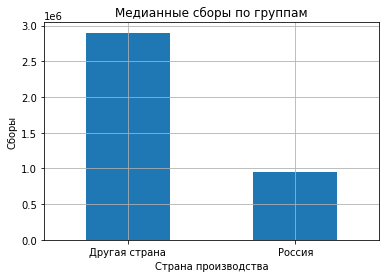

In [90]:
data.loc[data['production_country'].str.contains('Россия')==True, 'rus'] = 'Россия'

data['rus'] = data['rus'].fillna('Другая страна')

data.groupby('rus')['box_office'].median().plot(kind = 'bar', grid = True)
plt.title('Медианные сборы по группам')
plt.xlabel('Страна производства') 
plt.ylabel('Сборы')
plt.xticks(rotation = 'horizontal')
plt.show()

Очевидно, что сборы отечественных фильмов в разы ниже, чем сборы других стран из списка

In [29]:
data_support = data[
  (data['refundable_support'] > 0) | (data['nonrefundable_support'] > 0)]

data_support.pivot_table(index = 'production_country', values = 'budget', aggfunc = 'count')

,budget
production_country,
Россия,316
Россия - Грузия,1
"Россия, Армения",1
"Россия, Бельгия, Финляндия",1
"Россия, Германия",2
"Россия, Германия, Великобритания",1
"Россия, Германия, Казахстан, Польша, Китай",1
"Россия, Италия",2
"Россия, Латвия, Чешская Республика",1


И мы видим, что фильмы Российского производства имеющие гос поддержку составляют основную массу

In [30]:
data.loc[data['refundable_support']>0, 'refundable_support'].describe().round()

count          111.0
mean      35486486.0
std       31972875.0
min        3500000.0
25%       15000000.0
50%       25000000.0
75%       50000000.0
max      180000000.0
Name: refundable_support, dtype: float64

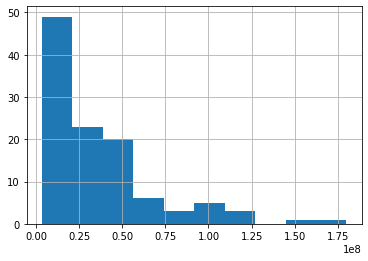

In [31]:
data.loc[data['refundable_support']>0, 'refundable_support'].hist();

In [32]:
data.loc[data['nonrefundable_support']>0, 'nonrefundable_support'].describe().round()


count          323.0
mean      50345784.0
std       60243206.0
min        3000000.0
25%       25000000.0
50%       30000000.0
75%       45000000.0
max      400000000.0
Name: nonrefundable_support, dtype: float64

<AxesSubplot:>

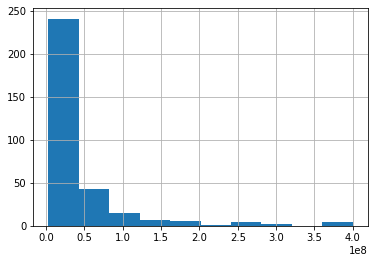

In [33]:
data.loc[data['nonrefundable_support']>0, 'nonrefundable_support'].hist()


In [34]:
data.loc[data['budget']>0, 'budget'].describe()


count    3.150000e+02
mean     1.340961e+08
std      1.912260e+08
min      1.446246e+07
25%      4.615387e+07
50%      7.337955e+07
75%      1.500043e+08
max      2.305074e+09
Name: budget, dtype: float64

<AxesSubplot:>

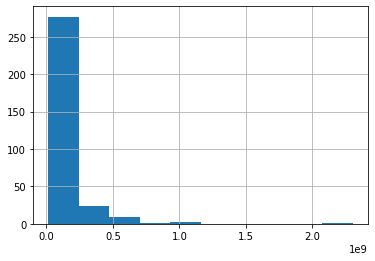

In [35]:
data.loc[data['budget']>0, 'budget'].hist()


In [36]:
data['ratings'].describe().round()

count    7486.0
mean        6.0
std         2.0
min         0.0
25%         5.0
50%         6.0
75%         7.0
max         9.0
Name: ratings, dtype: float64

<AxesSubplot:>

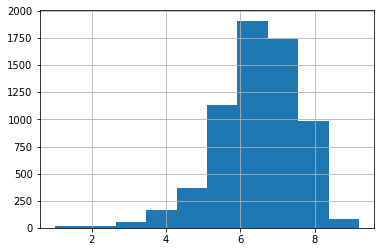

In [37]:
data.loc[data['ratings']>0, 'ratings'].hist()


In [38]:
data.loc[data['box_office']>0, 'box_office'].describe()

count    3.134000e+03
mean     7.706437e+07
std      2.411784e+08
min      4.000000e+01
25%      1.010288e+05
50%      2.409099e+06
75%      2.456979e+07
max      3.073569e+09
Name: box_office, dtype: float64

<AxesSubplot:>

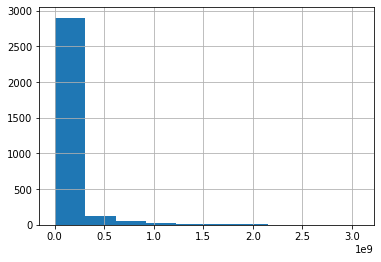

In [39]:
data.loc[data['box_office']>0, 'box_office'].hist()

In [40]:
#Проверим нет ли фильмов бюджет полностью состоял из государственной поддержки:

data[data['budget'] < data['nonrefundable_support'] + data['refundable_support']]


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rus
2053,14+,111023614,2014-12-19T12:00:00.000Z,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,1.023402e+07,Россия
2058,Дуxless 2,111000415,2015-01-26T12:00:00.000Z,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,4.461635e+08,Россия
2472,Воин (2015),111017315,2015-09-28T12:00:00.000Z,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",1.965724e+08,Россия
2532,Бармен.,111009615,2015-05-26T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",6.741897e+07,Россия
2615,Савва. Сердце воина,114001715,2015-07-21T12:00:00.000Z,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",1.844876e+08,Россия
2684,Тряпичный союз,111010215,2015-06-08T12:00:00.000Z,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,59000000.0,0.0,Фонд кино,6.3,"комедия,драма",1.957739e+06,Россия
2788,Срочно выйду замуж,111017115,2015-09-30T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,35000000.0,0.0,Фонд кино,5.1,"комедия,мелодрама",7.293778e+07,Россия
2874,Помню - не помню!,111004916,2016-03-01T12:00:00.000Z,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,6000000.0,0.0,Министерство культуры,4.3,комедия,1.536293e+07,Россия
3047,Любовь с ограничениями,111008216,2016-04-29T12:00:00.000Z,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.0,51000000.0,0.0,Фонд кино,6.3,"комедия,мелодрама",7.029905e+07,Россия
3565,Притяжение (2016),111018116,2016-12-16T12:00:00.000Z,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,250000000.0,0.0,Фонд кино,5.6,фантастика,1.038321e+09,Россия


17 фильмов имели финансирование полностью покрывающее бюджет

In [41]:
error_budget = data[
    data['budget'] < data['nonrefundable_support'] + data['refundable_support']].index

data = data.drop(index = error_budget)

data[data['budget'] < data['nonrefundable_support'] + data['refundable_support']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rus


Рассмотрев данные во всех количественных столбцах, возможно сделать следующие выводы:

- Средний арифметический показатель столбцов:

'refundable_support': 35 486 486
'nonrefundable_support': 50 345 784
'budget': 134 837 767
'box_office': 77 064 365

Прослеживается что сумма господдержки составляет примерно треть бюджета фильмов, а кассовые сборы не прекрывают затраченные на производство средства.

А также из исследования видно, что 17 фильмов были сняты полностью за счет Государства

- Сравнивая минимальные и максимальные значения, можно предположить, что:

'refundable_support': 0.0 min |  180 000 000 max
'nonrefundable_support': 0.0 min |  400 000 000 max
'budget': 0.0 min |  2 305 074 303 max
'box_office': 0.0 min |  3 073 568 691 max




#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [42]:
#Создадим новый столбец start_year:

data['show_start_date'] = pd.to_datetime(data['show_start_date'])

data['start_year'] = data['show_start_date'].dt.year

- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

Здесь хочется отметить, что в изначальном варианте столбцы, чьи данные мы берем за основу - могут содержать несколько фамилий или жанров. Нам же нужны основные.

In [43]:
#Для этого напишем собственную функцию, которая внесет в новый столбец только первые данные идущие до запятой:

def get_first_value(s, sep = ','):
    value_lst = s.split(sep=sep)
    return value_lst[0]

data['director_name'] = data['director'].apply(get_first_value)
data['genres_name'] = data['genres'].apply(get_first_value)    

display(data.tail(5))
                 

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,rus,start_year,director_name,genres_name
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,нет данных,0.0,нет данных,NaN,Другая страна,2019,Фил Грабски,нет данных
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,нет данных,5.4,"боевик,триллер",NaN,Другая страна,2019,Ник Пауэлл,боевик
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,0.0,нет данных,NaN,Другая страна,2019,Чарльз Е.Бастьен,нет данных
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,0.0,нет данных,NaN,Россия,2019,А.Беляев,нет данных
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,нет данных,6.3,"комедия,вестерн",NaN,Россия,2019,И.Трусов,комедия


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

Финансовые данные всегда требуют тщательной обработки, достаточно корректной, чтобы не сместить итог в ту или иную сторону. 

Мы помним, что наши данные неидеальны, но сами строки данных довольно корректны.

In [44]:
#Рассчитаем зависимость затраченного на фильм бюджет от поддержки:

non_ref_supp = data['nonrefundable_support'].sum()
ref_supp = data['refundable_support'].sum()
total_budg = data['budget'].sum()

part = ((non_ref_supp + ref_supp) / total_budg * 100).round()

print('Доля гос.поддержки от общего бюджета составит:', part, '%' )


Доля гос.поддержки от общего бюджета составит: 45.0 %


In [45]:
data['support_rate'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

support_rate = data['support_rate'] 

print('Доля гос.поддержки в каждом фильме составит:', support_rate, '%')

Доля гос.поддержки в каждом фильме составит: 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
7481   NaN
7482   NaN
7483   NaN
7484   NaN
7485   NaN
Name: support_rate, Length: 7469, dtype: float64 %


In [46]:
display(data.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,rus,start_year,director_name,genres_name,support_rate
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,NaN,нет данных,7.2,"боевик,драма,мелодрама",NaN,Другая страна,2015,Кевин Костнер,боевик,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,нет данных,«6+» - для детей старше 6 лет,NaN,...,NaN,нет данных,6.6,"драма,военный",NaN,Другая страна,2016,Е.Матвеев,драма,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,нет данных,6.8,"фантастика,боевик,триллер",NaN,Другая страна,2016,Тимур Бекмамбетов,фантастика,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,нет данных,6.8,"фантастика,боевик,триллер",NaN,Другая страна,2016,Тимур Бекмамбетов,фантастика,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,NaN,нет данных,6.8,"фантастика,боевик,триллер",NaN,Другая страна,2015,Тимур Бекмамбетов,фантастика,NaN


### Шаг 3. Проведём исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Обратим внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [47]:
#data = data.loc[data['box_office'] > 0]


data.groupby('start_year')[['title','box_office']].count()

,title,box_office
start_year,,
2010,985,105
2011,622,109
2012,593,128
2013,630,184
2014,806,278
2015,699,459
2016,815,523
2017,503,355
2018,887,471


Доля фильмов со сборами составляет: start_year
2010    0.102538
2011    0.175241
2012    0.207420
2013    0.284127
2014    0.337469
2015    0.652361
2016    0.640491
2017    0.705765
2018    0.531003
2019    0.569429
dtype: float64


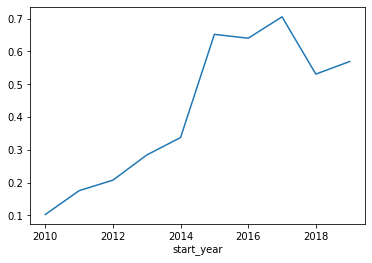

In [48]:
puNumber_count = data.groupby('start_year')['title'].count()
box_count = data.loc[data['box_office'] > 0].groupby('start_year')['box_office'].count()

part_year = box_count/puNumber_count

print('Доля фильмов со сборами составляет:', part_year)

part_year.plot();

Самые высокие сборы были у фильмов 2017 года. Основной рост наблюдался с 2014 года по 2017, к 2018 очевидно падение сборов.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

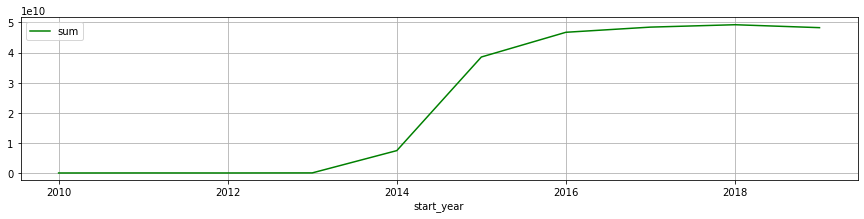

In [49]:
year_box = data.pivot_table(index = 'start_year', values = 'box_office', aggfunc = 'sum')
year_box.columns = ['sum']

year_box.plot(y = 'sum',color = 'green', figsize = (15,3), grid = True);

Мы видим, что в 2013 году рост кассовый сборов увеличивается, максимум приходится на 2018. Но также, вероятно за период 2010 - 2013 года данные представлены не в полном объеме.

In [50]:
print(year_box.max())
print(year_box.min())

sum    4.925199e+10
dtype: float64
sum    2428654.0
dtype: float64


- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

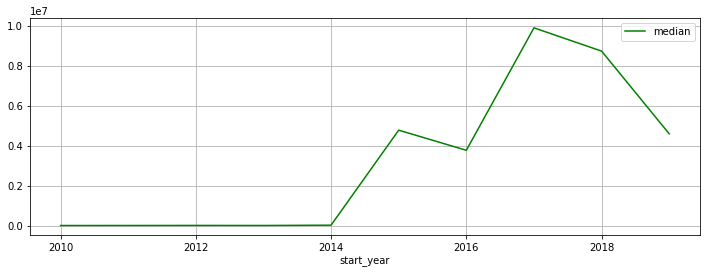

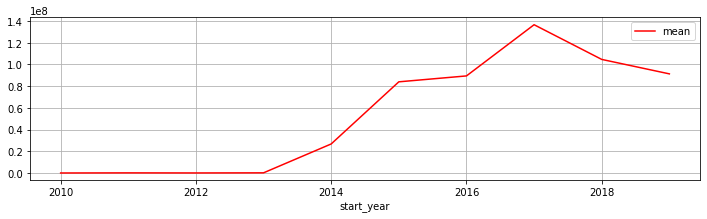

In [51]:
#Посмотрим на графике динамику кассовых сборов по годам:

year_box = data.pivot_table(index = 'start_year', values = 'box_office', aggfunc = ['mean', 'median'])
year_box.columns = ['mean', 'median']

year_box.plot(y = 'median',color = 'green', figsize = (12,4), grid = True);
year_box.plot(y = 'mean',color = 'red', figsize = (12,3), grid = True);

In [52]:
display(year_box.sort_values('median', ascending = False).round())

,mean,median
start_year,,
2017,136501823.0,9919415.0
2018,104568984.0,8751896.0
2015,83938621.0,4784782.0
2019,91262953.0,4601034.0
2016,89373454.0,3776088.0
2014,26743589.0,18138.0
2012,54339.0,5660.0
2013,161955.0,3522.0
2011,129383.0,3000.0


Если вопрос кассовых сборов до 2013 года - остается для нас открытым, то оба графика уверенно заявляют нам об успехе кинопроката в 2017 году. 

Как мы видим медиана значительно отличается от средних значений, вероятно причина в аномальных значениях минимальных и максимальных. Поскольку мы имели большое количество пропусков в исходных данных, то это могло отразиться на результате

- Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположим, с чем это может быть связано.

In [53]:
def get_first_value(s, sep = ' '):
    value_lst = s.split(sep=sep)
    return value_lst[0]

data['age_restriction'] = data['age_restriction'].apply(get_first_value)

In [54]:
#data['start_year_query'] = (data.query(('start_year > 2014')))

#age_stop = data.pivot_table(index = 'start_year_query', values = 'age_restriction', aggfunc = ['mean', 'median'])
#age_stop.columns = ['start_year_query', 'age_restriction']

#age_stop.sort_values('median', ascending = False).round()

#age_stop.plot(x='start_year_query', y='age_stop_query', kind='bar');

#age_stop.plot(y = 'median',color = 'green', figsize = (12,2), grid = True)
#age_stop.plot(y = 'mean',color = 'red', figsize = (12,2), grid = True)

age_data = data.query('start_year > 2014')

age_stop = age_data.pivot_table(
    index = 'start_year', columns = 'age_restriction', values = 'box_office', aggfunc = 'median').round()

display(age_stop)

age_restriction,«0+»,«12+»,«16+»,«18+»,«6+»
start_year,,,,,
2015,2943319.0,15144119.0,4321195.0,4654761.0,19513254.0
2016,2571294.0,4225478.0,5085193.0,6107002.0,3026256.0
2017,22178956.0,9010548.0,9641408.0,8212677.0,50274982.0
2018,3616937.0,8931966.0,8751896.0,7179466.0,14458669.0
2019,3885434.0,3405546.0,3210718.0,5603217.0,12525532.0


<AxesSubplot:xlabel='start_year'>

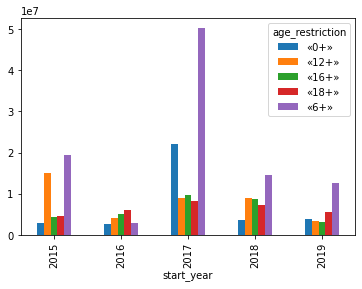

In [55]:
age_stop.plot(kind='bar')

2017 год - лидер сборов, что мы еще раз доказали. 

Зрители 6+ приносят максимальные сборы в 4ч из 5ти заявленных периодов

Зрители категорий 12+ показывают высокий результат сборов в 2015 году и дальее идут в средних показателях

Зрители 0+ показали скачок сборов в 2017 году, в остальные периоды уступают более взрослым категориям

Зрители 16+ и 18+ идут примерно одиноковыми показателями 

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Итак, важно понять целесообразна ли выделяемая государством поддержка. Да и в целом окупаются ли фильмы.

In [56]:
#Какую сумму составила гос поддержка за весь период:

total_support = data['nonrefundable_support'].sum() + data['refundable_support'].sum()

print('Сумма выделенная на поддержку кино, за изучаемый период составила:',total_support, 'руб.')

Сумма выделенная на поддержку кино, за изучаемый период составила: 18808718847.0 руб.


За 7 лет было выделено 18,8 млрд. рублей. Неплохо, но оправданно ли?

In [57]:
print('Общий кассовый сбор, за изучаемый период составил:',data['box_office'].sum(), 'руб.')

Общий кассовый сбор, за изучаемый период составил: 238746388471.90002 руб.


Сбор же составил 239 млрд., даже с учетом иностранного проката финансирование составляет только 10%

In [58]:
#Окупаются ли фильмы:

state_support = (data.query(('refundable_support > 0 or nonrefundable_support > 0 and budget > 0 and box_office > 0')))

state_support = state_support[['title', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office',]]

total_state_supp = state_support['refundable_support'].sum() + state_support['nonrefundable_support'].sum()

state_supp_per_budg = total_state_supp/state_support['budget'].sum()

total_payback = state_support['box_office'].sum() /state_support['budget'].sum()

print(total_payback)


0.9438550295650521


Получается, что фильмы почти окупаются, но не приносят прибыль

In [59]:
state_support['payback'] = state_support['box_office']/state_support['budget']

state_support['payback'] = state_support['payback'].replace(float('inf'), np.nan)

display(state_support['payback'].max())
display(state_support['payback'].median())


19.2098043174375

0.1486638202078148

In [60]:
len(state_support[state_support['payback'] >=1])

66

In [61]:
len(state_support[state_support['payback'] <=1])

235

Таким образом мы получаем что фильмов с окупаемостью, получивших гос поддержку - 66

А фильмов не окупившихся но получивших гос поддержку 235

# Общие сведения о полученных данных:

Итак в исследовании мы выяснили, что:

Мы видим, что к работе представлены две таблицы. Это не очень удобно и лучше будет их объединить в следующих шагах. 

Для  объеденения таблиц был выбран общий для обеих таблиц столбец 'puNumber'

По столбцу box_office мы проверили не исказились ли данные до объединения и после: 3158 - все на месте.  

Проверяя новую таблицу, выяснилось, что пропуски содержат столбцы с данными о получении и расходовании бюджета:

- refundable_support, nonrefundable_support, budget, financing_source, box_office  - возможно не все фильмы получали гос. поддержку. 

Но так как много пропусков есть и в значениях общего бюджета фильма и кассового сбора, то вероятно все же данные представлены не полном объеме. Поскольку дополнительного источника информации не было, а замена нулевыми значениями могла привести к искажению данных, было решено оставить пропуски в количественных столбцах.

Другие столбцы имеющие пропуски, содержат сведения о создателях фильмов и шоу, таким образом пропуски были изменены на  нейтральное значение "нет данных"

Разберем какие природу пропусков. Так например:

В столбцах refundable_support/nonrefundable_support мы видим одинаковое количество пропусков 7 154 и эти столбцы связаны тематически, возможно, что пропусками обозначено - отсутствие гос. поддержки, то есть пропуски случайные

При визуальном исследовании данных, наиболее частое повторение в названиях фильмов встречается у лент получивших разные прокатные удостоверения. Поскольку целью исследования являются тренды и предпочтения зрителей, а также положения лент получивших гос. поддержку решено, что подобные повторы не повлияют на исследование

## Теперь оценим положение на рынке российского кинопроката и выясним насколько зрителю интересны фильмы получившие гос. поддержку:


Выяснилось, что кассовый сбор большинства фильмов получивших гос поддержку отсутствует, и наоборот многие фильмы с кассой не имеют поддержки.  

### Была проверена гипотеза: гос поддержку получают фильмы производства РФ, их же кассовые сборы часто имеют низкий показатель. 

## Имеют ли кассовое приемущество фильмы зарубежного производства?

Очевидно, что сборы отечественных фильмов в разы ниже, чем сборы других стран из списка

Зачастую, сумма господдержки составляет примерно треть бюджета фильмов, а кассовые сборы не прекрывают затраченные на производство средства. Более того за 7 лет было снято 17 фильмов только за счет гос. поддержки

А также из исследования видно, что 17 фильмов были сняты полностью за счет Государства

Таким образом, исследование показало, что объем гос.поддержки от общего бюджета фильмов, составил: 45.0 %


## Что же показали кассовые сборы?

Самые высокие сборы были у фильмов 2017 года. Основной рост наблюдался с 2014 года по 2017, к 2018 очевидно.

Но поскольку, вероятно за период 2010 - 2013 года данные представлены не в полном объеме мы не можем утверждать о показателях этого периода.

Как мы видим медиана значительно отличается от средних значений, вероятно причина в аномальных значениях минимальных и максимальных. Поскольку мы имели большое количество пропусков в исходных данных, то это могло отразиться на результате



## Как влияют возрастные ограничения на кассовые сборы?

Зрители 6+ приносят максимальные сборы в 4ч из 5ти заявленных периодов

Зрители категорий 12+ показывают высокий результат сборов в 2015 году и дальее идут в средних показателях

Зрители 0+ показали скачок сборов в 2017 году, в остальные периоды уступают более взрослым категориям

Зрители 16+ и 18+ идут с примерно одиноковыми показателями 

Таким образом, очевидно что родители с детьми от 6 до 12 лет являются самыми активными зрителями. Но возможно и то, что представленные фильмы/мультфильмы с данной категорией настолько хороши, что собирают хорошую кассу и среди посетителей без детей.


# Общие итоги:

За 7 лет было выделено 18,8 млрд. рублей. Сбор же составил 239 млрд. - но это не дает нам сделать положительное заключение. Ведь в сборе учтены и фильмы иностранных производств. 

При общем расчете получается, что фильмы почти окупаются (показатель 0.94), но не приносят прибыль

Максимальный показатель составил 19.2 - то есть фильм принес в 19 раз больше собственного бюджета
АМинимальный показатель составил 0.14 - фильм не окупился совсем

Что же касается отечественных фильмов то из представленных данных, фильмов получивших гос поддержку - 66 единиц, которые окупились и 235 - которые не окупились.


Таким образом возможно сделать вывод о том, что фильмы Российского производства, производство которых поддерживает государство - чаще не приносят прибыль, более того не окупают даже затраченные на производство средства.
